# <center> **Screen Time Analysis 📱**</center>

## **<span style="color:purple;">📰About the Dataset</span>**

This dataset contains the usage statistics of various apps on a phone.
The dataset contains 5 columns:

> 1. <b>Date:</b> Date of the record
> 2. <b>Usage:</b> Number of times the user used the smartphone in a day
> 3. <b>Notifications:</b> Number of notifications the user received in a day
> 4. <b>Times opened:</b> Number of times the app was opened by the user
> 5. <b>App:</b> The app that was opened by the user

In [13]:
#imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Environment check
import warnings
warnings.filterwarnings("ignore")

In [5]:
data = pd.read_csv("Screentime-App-Details.csv")

In [7]:
data.head()

,Date,Usage,Notifications,Times opened,App
0,08/26/2022,38,70,49,Instagram
1,08/27/2022,39,43,48,Instagram
2,08/28/2022,64,231,55,Instagram
3,08/29/2022,14,35,23,Instagram
4,08/30/2022,3,19,5,Instagram


In [8]:
data.columns

Index(['Date', 'Usage', 'Notifications', 'Times opened', 'App'], dtype='object')

In [9]:
data.isnull().sum()

Date             0
Usage            0
Notifications    0
Times opened     0
App              0
dtype: int64

> Dataset has no Null Values

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Date           54 non-null     object
 1   Usage          54 non-null     int64 
 2   Notifications  54 non-null     int64 
 3   Times opened   54 non-null     int64 
 4   App            54 non-null     object
dtypes: int64(3), object(2)
memory usage: 2.2+ KB


## **<span style="color:purple;">👀Let's Analyse</span>**

In [18]:
most_opened = data['Times opened'].max()
print(most_opened)

corelated_notifications = data.loc[data['Times opened'] == most_opened, 'Notifications'].iloc[0]
print('No. of times user got notification = ', corelated_notifications, ' Max number of unlocks to their phone =', most_opened)

192
No. of times user got notification =  405  Max number of unlocks to their phone = 192


In [19]:
most_notifications = data['Notifications'].max()
corelated_unlocks = data.loc[data['Notifications'] == most_notifications, 'Times opened'].iloc[0]
print('No. of times user unlocked phone = ', corelated_unlocks, ' No. of max notifications =', most_notifications)

No. of times user unlocked phone =  192  No. of max notifications = 405


Text(0.5, 0, 'Values')

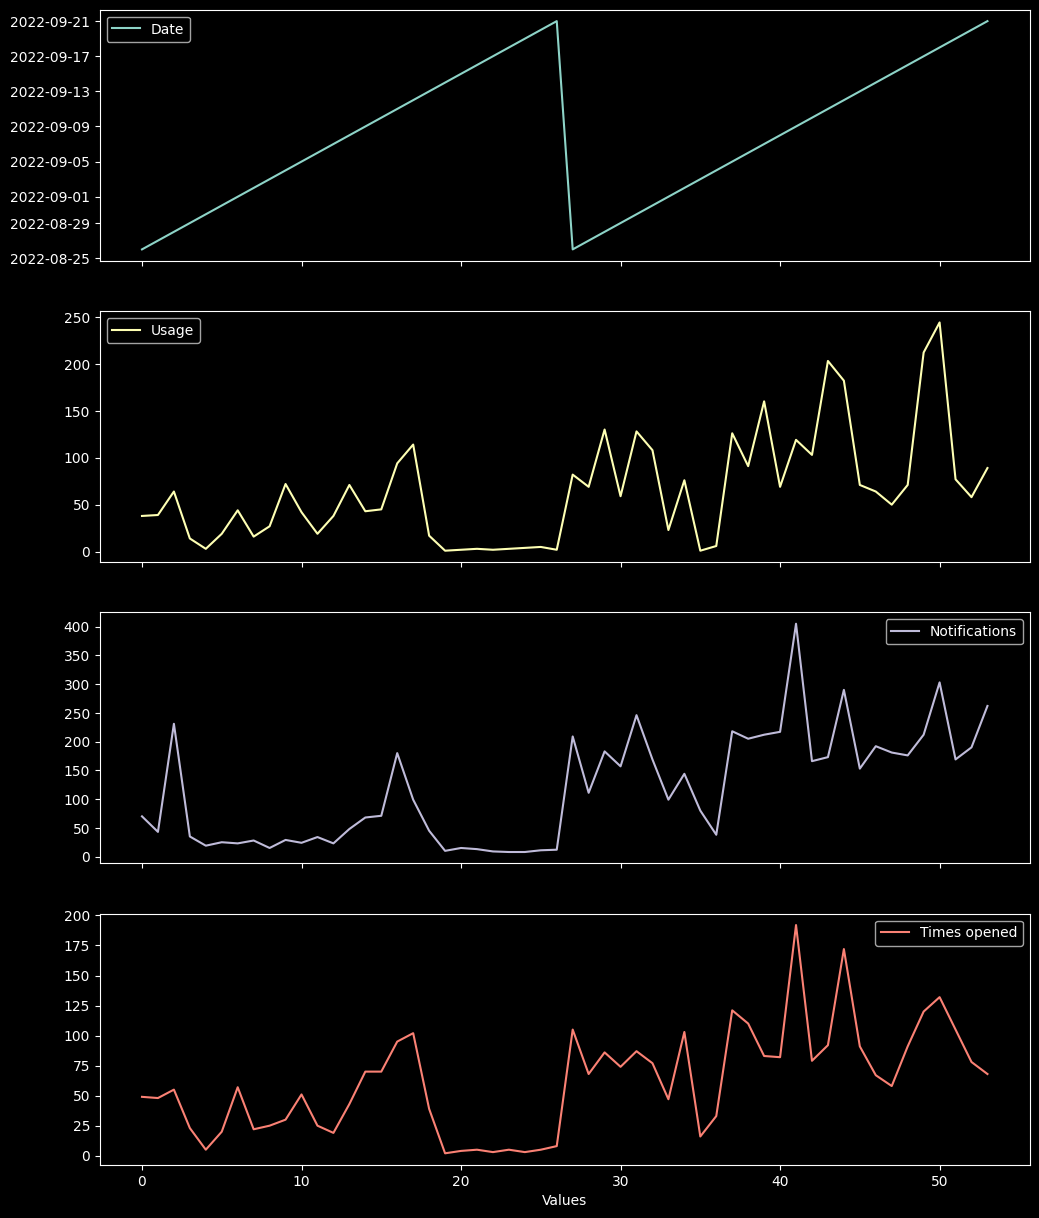

In [23]:
data['Date']= data['Date'].astype("datetime64[s]")
plt.style.use("dark_background") # fivethirtyeight
data.plot(subplots=True, figsize=(12, 15))
plt.xlabel('Values')

In [25]:
sorted_df = data.sort_values(by=['Usage'], ascending = False)
sorted_df.head()

,Date,Usage,Notifications,Times opened,App
50,2022-09-18,244,303,132,Whatsapp
49,2022-09-17,212,212,120,Whatsapp
43,2022-09-11,203,173,92,Whatsapp
44,2022-09-12,182,290,172,Whatsapp
39,2022-09-07,160,212,83,Whatsapp


Text(0.5, 1.0, 'Total Usage per Day')

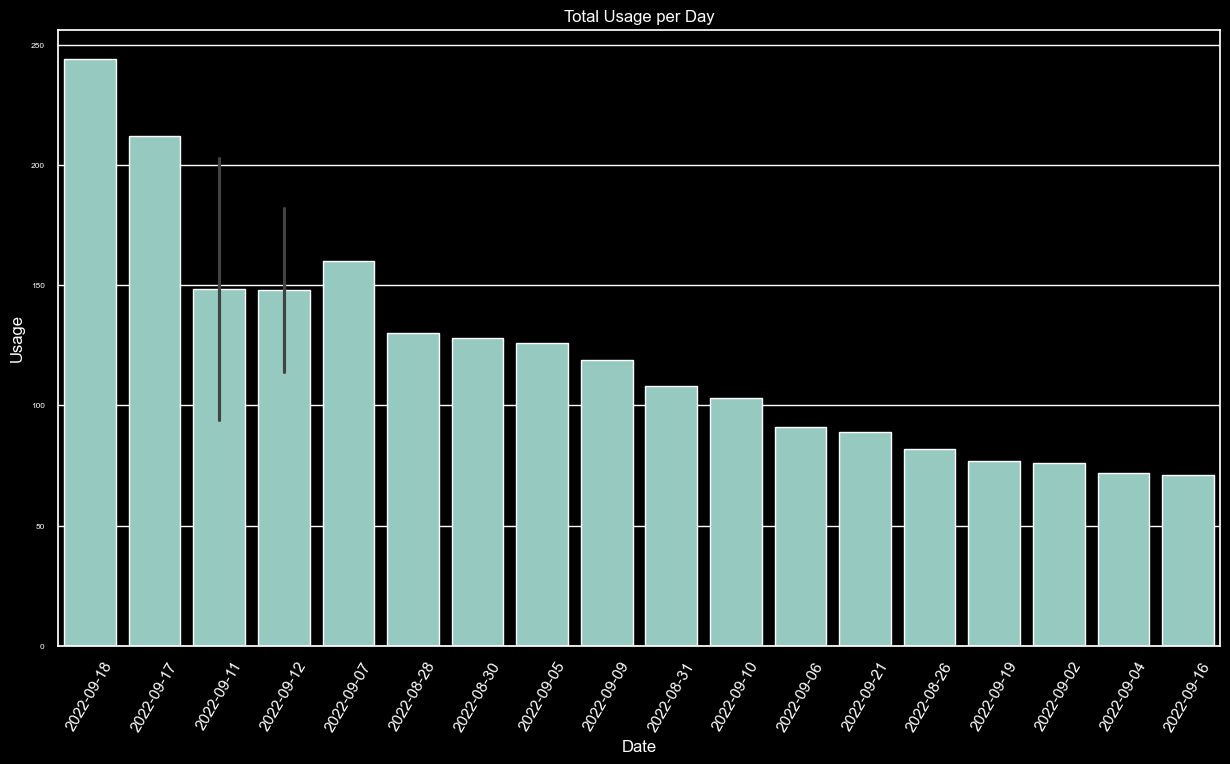

In [32]:
plt.figure(figsize=(15,8))
plt.style.use("dark_background")
sns.barplot(x='Date',y='Usage', data = sorted_df.head(20))
plt.yticks(fontsize= 6)
plt.ylabel('Usage')
plt.xlabel('Date')
plt.xticks(rotation = 60)
plt.title('Total Usage per Day')

## **<span style="color:purple;">Analysis on Apps</span>**

In [39]:
# Which app had max usage?

max_usage = data['Usage'].max()
_app = data.loc[data['Usage'] == max_usage, 'App'].iloc[0]

print(_app, 'had maximum usage ~', max_usage)

Whatsapp had maximum usage ~ 244


In [38]:
# Which app had least notifications

min_notification = data['Notifications'].min()
us_app = data.loc[data['Notifications'] == min_notification, 'App'].iloc[0]

print(us_app, 'had least notifications ~', min_notification)

Instagram had least notifications ~ 8


Text(0.5, 1.0, 'Total times apps were opened per Day')

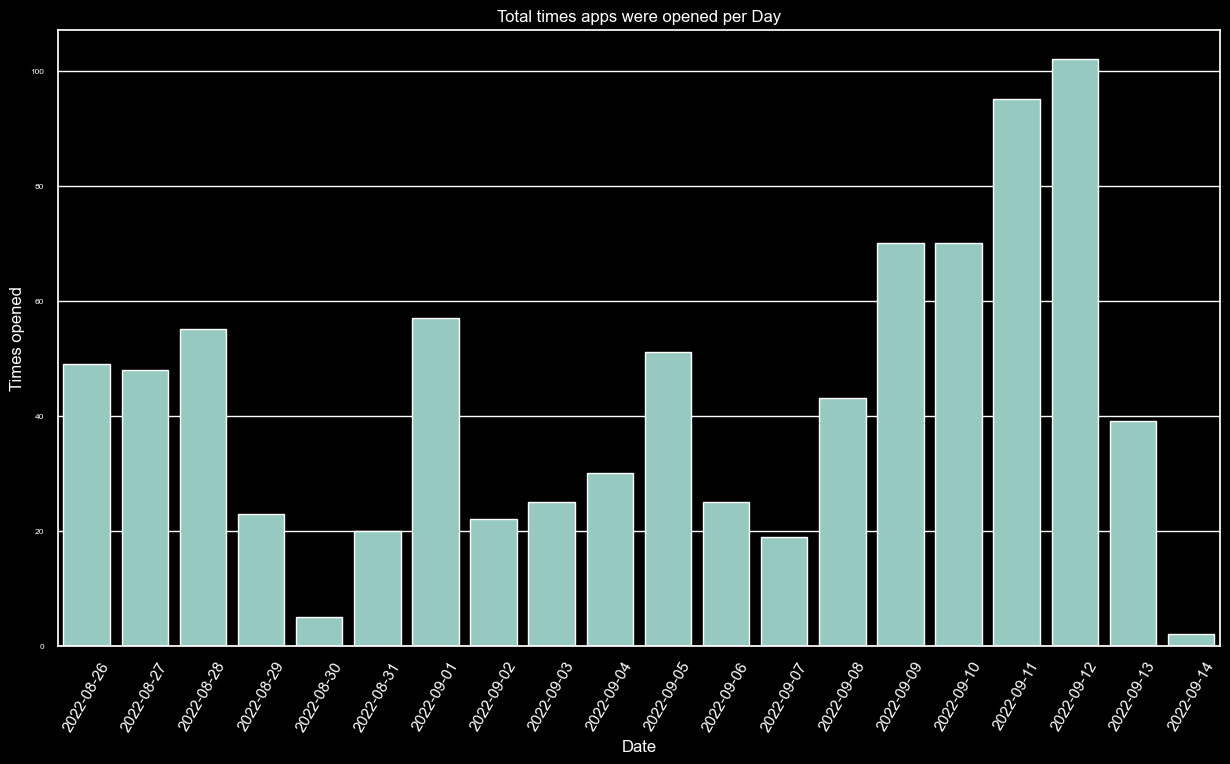

In [36]:
# Relation between Date and times an app was opened

plt.figure(figsize=(15,8))
plt.style.use("dark_background")
sns.barplot(x='Date',y='Times opened', data = data.head(20))
#sns.set(rc={'figure.figsize':(11.7,8.27)})
plt.yticks(fontsize= 6)
plt.ylabel('Times opened')
plt.xlabel('Date')
plt.xticks(rotation = 60)
plt.title('Total times apps were opened per Day')

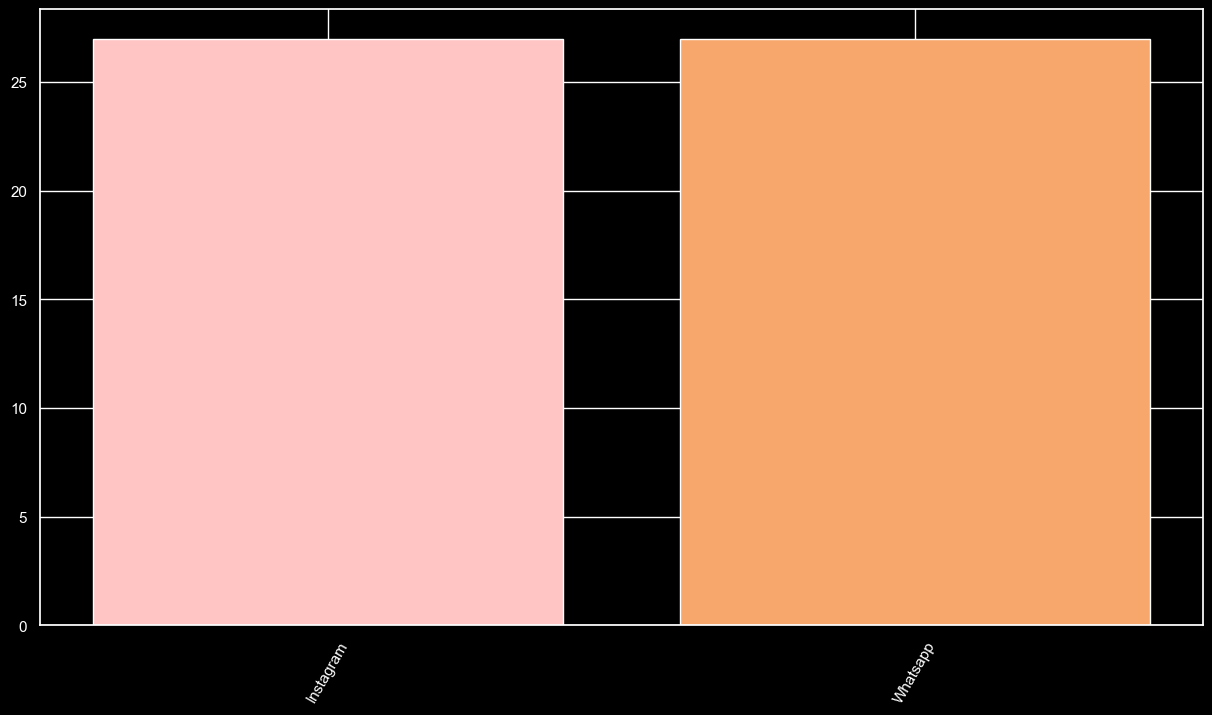

In [34]:
apps = data['App'].value_counts()
plt.figure(figsize=(15,8))
plt.bar(apps.index, apps, color=['#FFC4C4', '#F7A76C']) 
plt.xticks(rotation = 60)
plt.show()

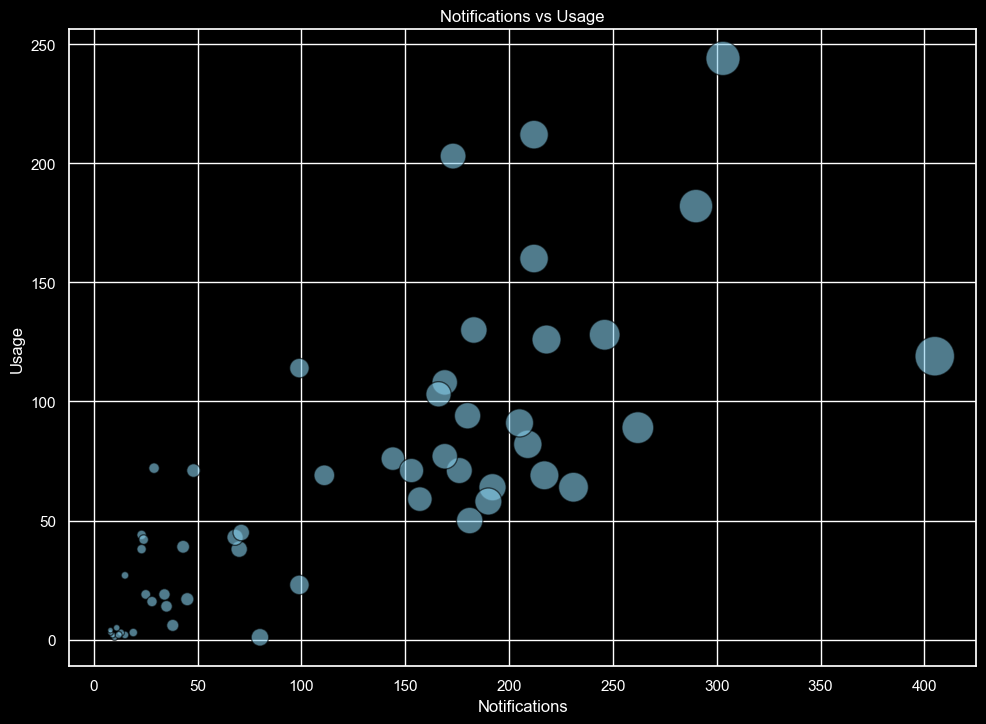

In [40]:
notifications = data['Notifications']
usage = data['Usage']
plt.scatter(notifications, usage, s=notifications*2, color='skyblue', alpha=0.6, edgecolor='black')
plt.xlabel('Notifications')
plt.ylabel('Usage')
plt.title('Notifications vs Usage')
plt.show()